C:\Users\User\AppData\Local\Temp\ipykernel_6284\3360567299.py:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


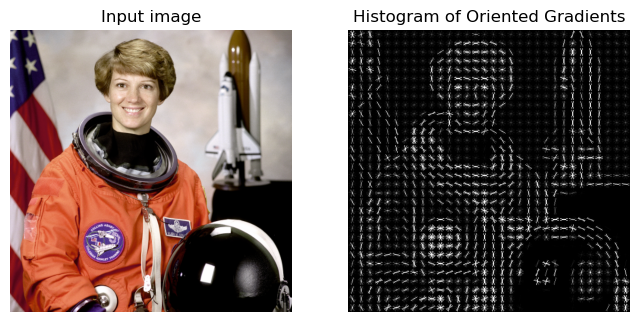

In [4]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

# Load image
image = data.astronaut()

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [5]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('hogoutput.jpg')

# Define the shearing matrix
shear_factor = 0.2
shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])

# Apply the shearing transformation using warpAffine() function
sheared_img = cv2.warpAffine(img, shear_matrix, (img.shape[1], img.shape[0]))

# Display the original and sheared image
cv2.imshow('Original Image', img)
cv2.imshow('Sheared Image', sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'

In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('hogoutput.png')

# Define the shearing matrix
shear_factor = 0.2
shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])

# Apply the shearing transformation using warpAffine() function
sheared_img = cv2.warpAffine(img, shear_matrix, (img.shape[1], img.shape[0]))

# Display the original and sheared image
cv2.imshow('Original Image', img)
cv2.imshow('Sheared Image', sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.show()

In [11]:
import cv2


img = cv2.imread('bad-path.png')

print(img.shape)


AttributeError: 'NoneType' object has no attribute 'shape'

In [12]:
def get_shape_of_object(obj):
  if obj is None:
    return None
  return obj.shape


value = None
print(get_shape_of_object(value))

None


In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('hogoutput.png')
plt.show()

NameError: name 'plt' is not defined

In [1]:
import cv2
import dlib
import numpy as np

# Load the input image
img = cv2.imread('hogoutput.png')

# Initialize the face detector and landmark estimator
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Detect faces in the input image
faces = detector(img, 0)

# Iterate over the detected faces
for face in faces:
    # Estimate the face landmarks
    landmarks = predictor(img, face)
    landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])

    # Calculate the center of the eyes and lips
    left_eye_center = np.mean(landmarks[36:42], axis=0)
    right_eye_center = np.mean(landmarks[42:48], axis=0)
    mouth_center = np.mean(landmarks[48:68], axis=0)

    # Calculate the scale, rotation and translation parameters
    dx = right_eye_center[0] - left_eye_center[0]
    dy = right_eye_center[1] - left_eye_center[1]
    angle = np.degrees(np.arctan2(dy, dx))
    scale = np.sqrt(dx ** 2 + dy ** 2)
    M = cv2.getRotationMatrix2D(tuple(mouth_center), angle, scale)
    tx = img.shape[1] // 2 - mouth_center[0]
    ty = img.shape[0] // 2 - mouth_center[1]
    M[0, 2] += tx
    M[1, 2] += ty

    # Apply the affine transformation to the input image
    output_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    # Display the original and transformed images
    cv2.imshow('Input Image', img)
    cv2.imshow('Output Image', output_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [2]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
 pip install cmake

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 32.6/32.6 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import dlib
import numpy as np

# Load the input image
img = cv2.imread('hogoutput.png')

# Initialize the face detector and landmark estimator
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Detect faces in the input image
faces = detector(img, 0)

# Iterate over the detected faces
for face in faces:
    # Estimate the face landmarks
    landmarks = predictor(img, face)
    landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])

    # Calculate the center of the eyes and lips
    left_eye_center = np.mean(landmarks[36:42], axis=0)
    right_eye_center = np.mean(landmarks[42:48], axis=0)
    mouth_center = np.mean(landmarks[48:68], axis=0)

    # Calculate the scale, rotation and translation parameters
    dx = right_eye_center[0] - left_eye_center[0]
    dy = right_eye_center[1] - left_eye_center[1]
    angle = np.degrees(np.arctan2(dy, dx))
    scale = np.sqrt(dx ** 2 + dy ** 2)
    M = cv2.getRotationMatrix2D(tuple(mouth_center), angle, scale)
    tx = img.shape[1] // 2 - mouth_center[0]
    ty = img.shape[0] // 2 - mouth_center[1]
    M[0, 2] += tx
    M[1, 2] += ty

    # Apply the affine transformation to the input image
    output_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    # Display the original and transformed images
    cv2.imshow('Input Image', img)
    cv2.imshow('Output Image', output_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'dlib'

In [1]:
%%cmd
where python

Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\User>where python
C:\ProgramData\Anaconda3\python.exe
C:\Users\User\AppData\Local\Microsoft\WindowsApps\python.exe

C:\Users\User>

In [2]:
import cv2

In [4]:
import cv2
print(cv2.__version__)

4.7.0


In [5]:
%%cmd
pip install face-recognition

Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\User>pip install face-recognition
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 100.1/100.1 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=8da7030dbc501fc24c72666f34ee5d0a47aaa02d5df773282893325750eedf3a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\a8\60\4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models
Failed to build dlib
  Running setup.py install for dlib: sta

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  error: subprocess-exited-with-error
  
  Running setup.py install for dlib did not run successfully.
  exit code: 1
  
  [9 lines of output]
  running install
  C:\ProgramData\Anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pi

In [1]:
!pip install dlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  error: subprocess-exited-with-error
  
  Running setup.py install for dlib did not run successfully.
  exit code: 1
  
  [9 lines of output]
  running install
  C:\ProgramData\Anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pi

In [6]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\User>pip install cmake
Defaulting to user installation because normal site-packages is not writeable

C:\Users\User>

In [10]:
%%cmd
python --version


Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\User>python --version
Python 3.9.13

C:\Users\User>

In [11]:
pip install dlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  error: subprocess-exited-with-error
  
  Running setup.py install for dlib did not run successfully.
  exit code: 1
  
  [9 lines of output]
  running install
  C:\ProgramData\Anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pi

C:\Users\User\AppData\Local\Temp\ipykernel_14972\719715363.py:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


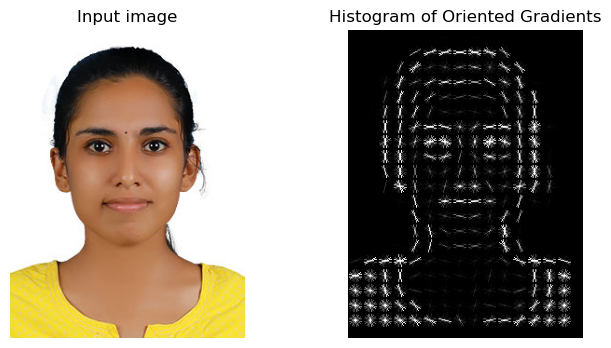

In [1]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load image
image = mpimg.imread('Neethu Photo.jpg')


# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [1]:
#dlib
import cv2
import dlib
import numpy as np

# Load the facial landmark detector provided by dlib
predictor_path = "path/to/shape_predictor_68_face_landmarks.dat"
# Create an array with the points for the lips and eyes
points = np.array([
    (landmarks.part(48).x, landmarks.part(48).y),  # left corner of the mouth
    (landmarks.part(54).x, landmarks.part(54).y),  # right corner of the mouth
    (landmarks.part(36).x, landmarks.part(36).y),  # left eye
    (landmarks.part(45).x, landmarks.part(45).y)   # right eye
])

# Define the new location of the points for the lips and eyes
new_points = np.array([
    (100, 100),
    (200, 100),
    (100, 200),
    (200, 200)
])

# Calculate the affine transformation matrix
M = cv2.getAffineTransform(points, new_points)

# Apply the transformation to the image
result = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Display the result
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

predictor = dlib.shape_predictor(predictor_path)

# Load the image and convert to grayscale
image_path = "path/to/image.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the face in the image
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

# Get the landmarks for the face in the image
landmarks = predictor(gray, rects[0])


NameError: name 'landmarks' is not defined

In [2]:
import cv2
import dlib
import numpy as np

# Load the facial landmark detector provided by dlib
predictor_path = "path/to/shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(predictor_path)

# Load the image and convert to grayscale
image_path = "path/to/image.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the face in the image
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

# Get the landmarks for the face in the image
landmarks = predictor(gray, rects[0])

# Create an array with the points for the lips and eyes
points = np.array([
    (landmarks.part(48).x, landmarks.part(48).y),  # left corner of the mouth
    (landmarks.part(54).x, landmarks.part(54).y),  # right corner of the mouth
    (landmarks.part(36).x, landmarks.part(36).y),  # left eye
    (landmarks.part(45).x, landmarks.part(45).y)   # right eye
])

# Define the new location of the points for the lips and eyes
new_points = np.array([
    (100, 100),
    (200, 100),
    (100, 200),
    (200, 200)
])

# Calculate the affine transformation matrix
M = cv2.getAffineTransform(points, new_points)

# Apply the transformation to the image
result = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Display the result
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


RuntimeError: Unable to open path/to/shape_predictor_68_face_landmarks.dat

In [2]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
cmake --version

NameError: name 'cmake' is not defined

In [6]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
cmake --version

NameError: name 'cmake' is not defined

In [20]:
cmake --version

NameError: name 'cmake' is not defined

In [11]:
pip install pipreqs


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0ffa20c92e8e1a3e73d5028157630f7dcf36c644bc2c96434b20306df2e79192
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
pipreqs


NameError: name 'pipreqs' is not defined

In [ ]:
python --version

In [3]:
import cv2
import dlib

# Load the facial landmark detector provided by dlib
predictor_path = "Neethu Photo.jpg"
predictor = dlib.shape_predictor(predictor_path)

# Load the image and convert to grayscale
image_path = "path/to/image.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the face in the image
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

# Get the landmarks for the face in the image
landmarks = predictor(gray, rects[0])

# Draw the landmarks on the image
for i in range(68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display the result
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


RuntimeError: Error deserializing object of type int

In [4]:
import matplotlib.image as mpimg
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = mpimg.imread('Neethu Photo.jpg')

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

# Save HOG image as a PNG file
mpimg.imsave('neethu_hog_image.png', hog_image_rescaled, cmap=plt.cm.gray)

plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [5]:
pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
      --------------------------------------- 0.1/7.6 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/7.6 MB 4.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ------ --------------------------------- 1.3/7.6 MB 7.0 MB/s eta 0:00:01
     ---------- ----------------------------- 2.1/7.6 MB 8.8 MB/s eta 0:00:01
     ------------ --------------------------- 2.3/7.6 MB 8.2 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 8.9 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 8.9 MB/s eta 0:00:01
     ------------------ --------------------- 3.6/7.6 MB 8.5 MB/s eta 0:00:01
     --------------------- ------------------ 4.0/7.6 MB 8.9 MB/s eta 0:00:01
     ------------------------ --------------- 4.6/7.6 MB 8.9 MB/s eta 0:00:01
     -------------------------- ------------- 5.0/7.6 MB 8.9 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1 requires requests, which is not installed.
facenet-pytorch 2.5.2 requires requests, which is not installed.


In [8]:
import matplotlib.image as mpimg
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = mpimg.imread('Neethu Photo.jpg')

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

# Save HOG image as a PNG file
mpimg.imsave('neethu_hog_image.png', hog_image_rescaled, cmap=plt.cm.gray)

plt.show()


ModuleNotFoundError: No module named 'skimage'

In [1]:
pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
import matplotlib.image as mpimg
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = mpimg.imread('Neethu Photo.jpg')

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

# Save HOG image as a PNG file
mpimg.imsave('neethu_hog_image.png', hog_image_rescaled, cmap=plt.cm.gray)

plt.show()


ModuleNotFoundError: No module named 'skimage'

In [2]:
import cv2
import dlib
import numpy as np
from skimage.feature import hog
from skimage import data, exposure

# Load the image and calculate HOG features
image_path = "Neethu Photo.jpg.jpg"
image = cv2.imread(image_path)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Define the new location of the points for the lips and eyes
new_points = np.array([
    (100, 100),
    (200, 100),
    (100, 200),
    (200, 200)
])

# Calculate the affine transformation matrix
M = cv2.getAffineTransform(points, new_points)

# Apply the transformation to the HOG image
result = cv2.warpAffine(hog_image, M, (hog_image.shape[1], hog_image.shape[0]))

# Display the result
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'skimage'

In [6]:
!pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
python -m pip install scikit-image

SyntaxError: invalid syntax (2863440059.py, line 1)

In [4]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [8]:

import cv2
import dlib
import numpy as np
from skimage.feature import hog
from skimage import data, exposure

# Load the image and calculate HOG features
image_path = "Neethu Photo.jpg.jpg"
image = cv2.imread(image_path)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Define the new location of the points for the lips and eyes
new_points = np.array([
    (100, 100),
    (200, 100),
    (100, 200),
    (200, 200)
])

# Calculate the affine transformation matrix
M = cv2.getAffineTransform(points, new_points)

# Apply the transformation to the HOG image
result = cv2.warpAffine(hog_image, M, (hog_image.shape[1], hog_image.shape[0]))

# Display the result
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


TypeError: hog() got an unexpected keyword argument 'multichannel'

In [9]:
!pip install -U scikit-image


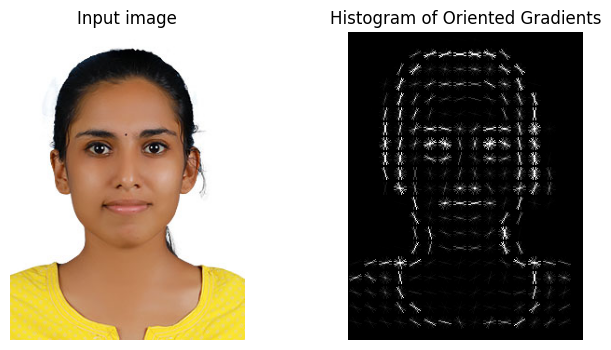

[0.         0.         0.         ... 0.05534547 0.20411052 0.01956758]


In [11]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
image = mpimg.imread('Neethu Photo.jpg')

# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Calculate HOG features
fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
print(fd)

In [12]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load image
image_path = "Neethu Photo.jpg"
image = mpimg.imread(image_path)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot HOG image
fig, ax = plt.subplots(figsize=(8, 4), sharex=True, sharey=True)

ax.axis('off')
ax.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax.set_title('Histogram of Oriented Gradients')
plt.show()


TypeError: hog() got an unexpected keyword argument 'multichannel'

In [13]:
!pip install -U scikit-image


In [14]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load image
image_path = "Neethu Photo.jpg"
image = mpimg.imread(image_path)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot HOG image
fig, ax = plt.subplots(figsize=(8, 4), sharex=True, sharey=True)

ax.axis('off')
ax.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax.set_title('Histogram of Oriented Gradients')
plt.show()


TypeError: hog() got an unexpected keyword argument 'multichannel'

In [1]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load image
image_path = "Neethu Photo.jpg"
image = mpimg.imread(image_path)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot HOG image
fig, ax = plt.subplots(figsize=(8, 4), sharex=True, sharey=True)

ax.axis('off')
ax.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax.set_title('Histogram of Oriented Gradients')
plt.show()


TypeError: hog() got an unexpected keyword argument 'multichannel'

In [2]:
!pip install -U scikit-image


In [5]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load image
image_path = "Neethu Photo.jpg"
image = mpimg.imread(image_path)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot HOG image
fig, ax = plt.subplots(figsize=(8, 4), sharex=True, sharey=True)

ax.axis('off')
ax.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax.set_title('Histogram of Oriented Gradients')
plt.show()


TypeError: hog() got an unexpected keyword argument 'multichannel'

In [7]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure, io

image_path = "Neethu Photo.jpg"
image = io.imread(image_path, as_gray=True)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, image_shape=(image.shape[0], image.shape[1], 1))

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display HOG image
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


TypeError: hog() got an unexpected keyword argument 'image_shape'

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from skimage import exposure

# Load image
image_path = "Neethu Photo.jpg"
image = mpimg.imread(image_path)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True, block_norm='L2-Hys')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Plot HOG image
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG features')

plt.show()


TypeError: hog() got an unexpected keyword argument 'multichannel'

In [10]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

image_path = "Neethu Photo.jpg"
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate HOG features
fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys', feature_vector=True, input_shape=image.shape)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image and HOG image side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.axis('off')

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG')
ax2.axis('off')

plt.show()


TypeError: hog() got an unexpected keyword argument 'input_shape'

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from skimage import exposure

# Load image
image_path = "Neethu Photo.jpg"
image = mpimg.imread(image_path)

# Calculate HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys', feature_vector=False)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display original and HOG image side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Remove ticks from HOG image
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_axis_off()

plt.show()


ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

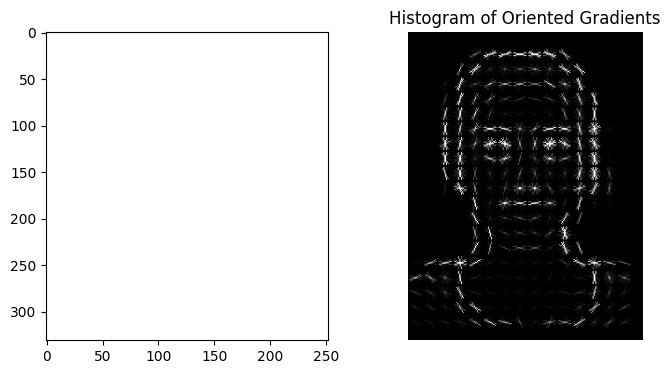

[0.         0.         0.         ... 0.05534547 0.20411052 0.01956758]


In [13]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
image = mpimg.imread('Neethu Photo.jpg')

# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Calculate HOG features
fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

#ax1.axis('off')
#ax1.imshow(image, cmap=plt.cm.gray)
#ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
print(fd)

In [14]:
import cv2
import dlib

# Load image and create HOG features
image_path = "your_image.jpg"
image = cv2.imread(image_path)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
fd = hog.compute(image)

# Initialize facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Detect faces in the image
faces = detector(image, 0)

# Iterate over each detected face and find facial landmarks
for face in faces:
    landmarks = predictor(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), face)

    # Iterate over each facial landmark and draw a circle at the location
    for i in range(0, 68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Display the output image
cv2.imshow("Facial Landmarks", image)
cv2.waitKey(0)


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\hog.cpp:243: error: (-215:Assertion failed) !img.empty() in function 'cv::HOGDescriptor::computeGradient'


In [1]:
import cv2
import dlib
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

# Load image
image_path = "test.jpg"
try:
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image file")
except Exception as e:
    print(f"Error: {e}")
    exit()

# Initialize HOG descriptor for pedestrian detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect pedestrians in image
pedestrians, _ = hog.detectMultiScale(image)

# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in pedestrians:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Initialize facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in grayscale image
faces = detector(gray, 0)

# Iterate over detected faces
for (i, face) in enumerate(faces):
    # Determine facial landmarks for current face
    landmarks = predictor(gray, face)
    landmarks = face_utils.shape_to_np(landmarks)

    # Draw facial landmarks on image
    for (x, y) in landmarks:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


ModuleNotFoundError: No module named 'imutils'

In [2]:
!pip install imutils


Defaulting to user installation because normal site-packages is not writeable
  Using cached imutils-0.5.4-py3-none-any.whl


In [3]:
import cv2
import dlib
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

# Load image
image_path = "Neethu Photo.jpg"
try:
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image file")
except Exception as e:
    print(f"Error: {e}")
    exit()

# Initialize HOG descriptor for pedestrian detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect pedestrians in image
pedestrians, _ = hog.detectMultiScale(image)

# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in pedestrians:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Initialize facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"C:\Users\User\Downloads\shape_predictor_68_face_landmarks.dat.bz2")


# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in grayscale image
faces = detector(gray, 0)

# Iterate over detected faces
for (i, face) in enumerate(faces):
    # Determine facial landmarks for current face
    landmarks = predictor(gray, face)
    landmarks = face_utils.shape_to_np(landmarks)

    # Draw facial landmarks on image
    for (x, y) in landmarks:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


RuntimeError: Unexpected version found while deserializing dlib::shape_predictor.

In [1]:
!pip show dlib


In [3]:
import cv2
import dlib
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

# Load image
image_path = "Neethu Photo.jpg"
try:
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image file")
except Exception as e:
    print(f"Error: {e}")
    exit()

# Initialize HOG descriptor for pedestrian detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect pedestrians in image
pedestrians, _ = hog.detectMultiScale(image)

# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in pedestrians:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Initialize facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"C:\Users\User\Downloads\shape_predictor_68_face_landmarks.dat.bz2")


# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in grayscale image
faces = detector(gray, 0)

# Iterate over detected faces
for (i, face) in enumerate(faces):
    # Determine facial landmarks for current face
    landmarks = predictor(gray, face)
    landmarks = face_utils.shape_to_np(landmarks)

    # Draw facial landmarks on image
    for (x, y) in landmarks:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


AttributeError: module 'dlib' has no attribute 'get_frontal_face_detector'

In [9]:
import dlib

predictor_path = "predictor_path = C:/Users/User/Downloads/shape_predictor_68_face_landmarks.dat.bz2"

predictor = dlib.shape_predictor(predictor_path)


RuntimeError: Unable to open predictor_path = C:/Users/User/Downloads/shape_predictor_68_face_landmarks.dat.bz2

In [10]:
import urllib.request
import bz2
import os

predictor_url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
predictor_path = 'shape_predictor_68_face_landmarks.dat'

if not os.path.isfile(predictor_path):
    print('Downloading predictor file...')
    urllib.request.urlretrieve(predictor_url, predictor_path+'.bz2')
    with open(predictor_path, 'wb') as f:
        f.write(bz2.BZ2File(predictor_path+'.bz2').read())
    print('Predictor file extracted.')
else:
    print('Predictor file already exists.')


Predictor file extracted.


In [1]:
import dlib

predictor_path = "hape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(predictor_path)


AttributeError: module 'dlib' has no attribute 'shape_predictor'

In [4]:
pip install --upgrade dlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [70 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  C:\Users\User\AppData\Local\Temp\pip-install-05fvmnmj\dlib_c2729a8b88074103b36a456f9776cd7d\setup.py:129: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cmake_version) < '3.1.0':
  Building extension for Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\User\AppData\Local\Temp\pip-install-05fvmnmj\dlib_c2729a8b88074103b36a456f9776cd7d\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\User\AppData\Local\Temp\pip-install-05fvmnmj\dlib_c2729a8b88074103b36a456f9776cd7d\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\ProgramData\Anaconda3\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\User\AppData\Local\Temp\pip-install-05fvmnm

In [8]:
import cv2
import dlib
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

# Load image
image_path = "Neethu Photo.jpg"
try:
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image file")
except Exception as e:
    print(f"Error: {e}")
    exit()

# Initialize HOG descriptor for pedestrian detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect pedestrians in image
pedestrians, _ = hog.detectMultiScale(image)

# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in pedestrians:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Initialize facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"C:\Users\User\Downloads\shape_predictor_68_face_landmarks.dat.bz2")


# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in grayscale image
faces = detector(gray, 0)

# Iterate over detected faces
for (i, face) in enumerate(faces):
    # Determine facial landmarks for current face
    landmarks = predictor(gray, face)
    landmarks = face_utils.shape_to_np(landmarks)

    # Draw facial landmarks on image
    for (x, y) in landmarks:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


AttributeError: module 'dlib' has no attribute 'get_frontal_face_detector'

In [2]:
pip install --upgrade dlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [70 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  C:\Users\User\AppData\Local\Temp\pip-install-uodrj0e7\dlib_0977729bf6e645c08325d58a54317db0\setup.py:129: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cmake_version) < '3.1.0':
  Building extension for Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\User\AppData\Local\Temp\pip-install-uodrj0e7\dlib_0977729bf6e645c08325d58a54317db0\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\User\AppData\Local\Temp\pip-install-uodrj0e7\dlib_0977729bf6e645c08325d58a54317db0\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\ProgramData\Anaconda3\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\User\AppData\Local\Temp\pip-install-uodrj0e

In [6]:
import cv2
import dlib

# Load the facial landmark detector provided by dlib
predictor_path = "path/to/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)

# Load the image and convert to grayscale
image_path = "path/to/image.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the face in the image
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

# Get the landmarks for the face in the image
landmarks = predictor(gray, rects[0])

# Draw the landmarks on the imagedata = pd.read_csv('filename.dat', delimiter=' ')

for i in range(68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display the result
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


RuntimeError: Unable to open path/to/shape_predictor_68_face_landmarks.dat

In [5]:
!pip show dlib


Name: dlib
Version: 19.24.0
Summary: A toolkit for making real world machine learning and data analysis applications
Home-page: https://github.com/davisking/dlib
Author: Davis King
Author-email: davis@dlib.net
License: Boost Software License
Location: c:\users\user\.conda\envs\env_sid\lib\site-packages
Requires: 
Required-by: 


In [7]:
import pandas as pd
data = pd.read_csv('http://localhost:8890/edit/shape_predictor_68_face_landmarks_GTX.dat', delimiter=' ')
# Example analysis
mean = data.mean()
print(mean)


ModuleNotFoundError: No module named 'pandas'

In [8]:
pip install pandas

     ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/10.9 MB 1.7 MB/s eta 0:00:07
     - -------------------------------------- 0.5/10.9 MB 5.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.8/10.9 MB 5.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/10.9 MB 5.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.5/10.9 MB 6.4 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/10.9 MB 6.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/10.9 MB 6.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.3/10.9 MB 6.2 MB/s eta 0:00:02
     --------- ------------------------------ 2.6/10.9 MB 6.1 MB/s eta 0:00:02
     ---------- ----------------------------- 2.8/10.9 MB 5.9 MB/s eta 0:00:02
     ---------- ----------------------------- 2.9/10.9 MB 5.8 MB/s eta 0:00:02
     ----------- ---------------------------- 3.1/10.9 MB 5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.12 requires appdirs>=1.4.4, which is not installed.
yfinance 0.2.12 requires cryptography>=3.3.2, which is not installed.
yfinance 0.2.12 requires requests>=2.26, which is not installed.
nlp 0.4.0 requires dill, which is not installed.
nlp 0.4.0 requires filelock, which is not installed.
nlp 0.4.0 requires requests>=2.19.0, which is not installed.
nlp 0.4.0 requires tqdm>=4.27, which is not installed.


In [9]:
import pandas as pd
data = pd.read_csv('http://localhost:8890/edit/shape_predictor_68_face_landmarks_GTX.dat', delimiter=' ')
# Example analysis
mean = data.mean()
print(mean)


ParserError: Error tokenizing data. C error: Expected 2 fields in line 5, saw 6


In [ ]:
import cv2
import dlib
import numpy as np
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks_GTX.dat')

# Use the predictor to detect landmarks in an image



# Load the facial landmark detector provided by dlib



# Load the image and convert to grayscale
image_path = "Neethu Photo.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_path)
# Detect the face in the image
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

# Get the landmarks for the face in the image
landmarks = predictor(gray, rects[0])

# Draw the landmarks on the imagedata = pd.read_csv('filename.dat', delimiter=' ')

for i in range(68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display the result
#cv2.imshow("Result", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


landmark_array = np.empty([68, 2], dtype=int)
for i in range(68):
    landmark_array[i] = (landmarks.part(i).x, landmarks.part(i).y)

print(landmark_array)


In [ ]:
import cv2
import dlib

predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks_GTX.dat')

# Use the predictor to detect landmarks in an image



# Load the facial landmark detector provided by dlib



# Load the image and convert to grayscale
image_path = "hogcropped.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the face in the image
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

# Get the landmarks for the face in the image
landmarks = predictor(gray, rects[0])

# Draw the landmarks on the imagedata = pd.read_csv('filename.dat', delimiter=' ')

for i in range(68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Display the result
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
